In [3]:
# Import the required libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [4]:
dataframe = pd.read_csv(
    Path('Data_train.csv'),
    parse_dates=True,
    infer_datetime_format=True)

# Review the DataFrame
dataframe.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [5]:
dataframe["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [6]:
(dataframe.isnull().sum()/dataframe.shape[0])*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [7]:
dataframe.dropna(inplace= True)
dataframe.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
dataframe["Journey_day"] = pd.to_datetime(dataframe.Date_of_Journey, format="%d/%m/%Y").dt.day
dataframe["Journey_month"] = pd.to_datetime(dataframe["Date_of_Journey"], format = "%d/%m/%Y").dt.month
dataframe.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [9]:
dataframe["Dep_hour"] = pd.to_datetime(dataframe["Dep_Time"]).dt.hour
dataframe["Dep_min"] = pd.to_datetime(dataframe["Dep_Time"]).dt.minute
dataframe.drop(["Dep_Time"], axis = 1, inplace = True)

In [10]:
dataframe["Arrival_hour"] = pd.to_datetime(dataframe.Arrival_Time).dt.hour
dataframe["Arrival_min"] = pd.to_datetime(dataframe.Arrival_Time).dt.minute
dataframe.drop(["Arrival_Time"], axis = 1, inplace = True)

In [11]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
dataframe['Duration_hours']=dataframe.Duration.apply(lambda x:get_duration(x)[0])
dataframe['Duration_mins']=dataframe.Duration.apply(lambda x:get_duration(x)[1])
dataframe.drop(["Duration"], axis = 1, inplace = True)

In [12]:
#Dataframe to hold Airline data and create dummies
Airline_df = dataframe[["Airline"]]
Airline_df = pd.get_dummies(Airline_df, drop_first= True)

In [13]:
#Dataframe to hold Source data and create dummies
Source_df = dataframe[["Source"]]
Source_df = pd.get_dummies(Source_df, drop_first= True)

In [14]:
#Dataframe to hold Destination data and create dummies
Destination_df = dataframe[["Destination"]]
Destination_df = pd.get_dummies(Destination_df, drop_first = True)

In [15]:
dataframe.drop(["Route"], axis = 1, inplace = True)

In [16]:
dataframe["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [17]:
dataframe.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [18]:
dataframe.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [19]:
dataframe['Additional_Info'].replace({"No info": "No Info"}, inplace = True)

In [20]:
Add_info_df = dataframe[["Additional_Info"]]
Add_info_df = pd.get_dummies(Add_info_df, drop_first = True)

In [21]:
dataframe = pd.concat([dataframe, Airline_df, Source_df, Destination_df, Add_info_df], axis = 1)
dataframe.drop(["Airline", "Source", "Destination","Additional_Info"], axis = 1, inplace = True)

In [22]:
dataframe.shape[1]

38

In [23]:
OHE_model = OneHotEncoder(handle_unknown = 'ignore')

In [24]:
y = dataframe['Price']
X = dataframe.drop('Price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
# Declare a linear regression model.
linear_regression_model = linear_model.LinearRegression()

# Fit and save the linear regression model using the training data
lr_model = linear_regression_model.fit(X_train, y_train)

In [41]:
print(lr_model.score(X_test,y_test))

0.6891578386630356


In [42]:
y_predict = lr_model.predict(X_test)

In [43]:
number_of_observations = 25

Linear_Plot = range(len(y_test[:number_of_observations]))

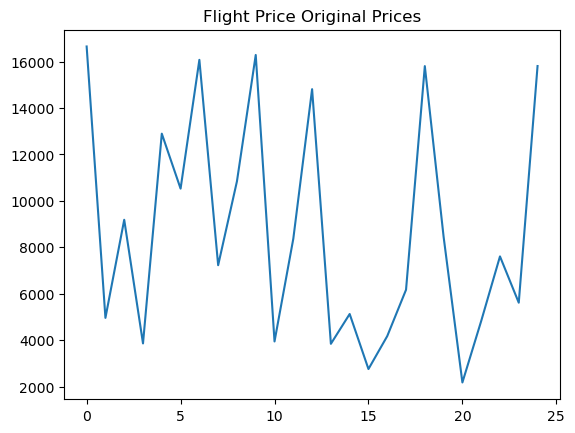

In [44]:
plt.title("Flight Price Original Prices")
plt.plot(Linear_Plot, y_test[:number_of_observations], label="Original")

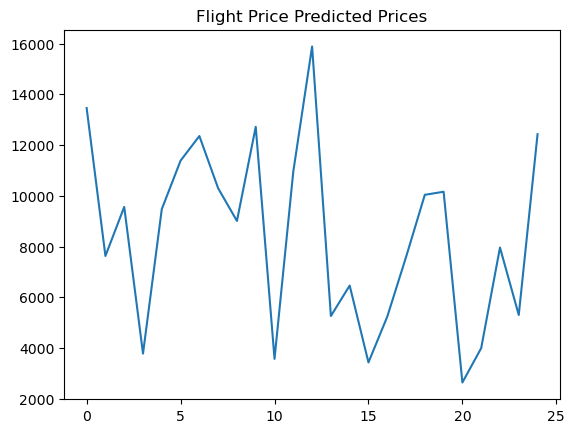

In [35]:
plt.title("Flight Price Predicted Prices")
plt.plot(Linear_Plot, y_predict[:number_of_observations], label="Predicted")

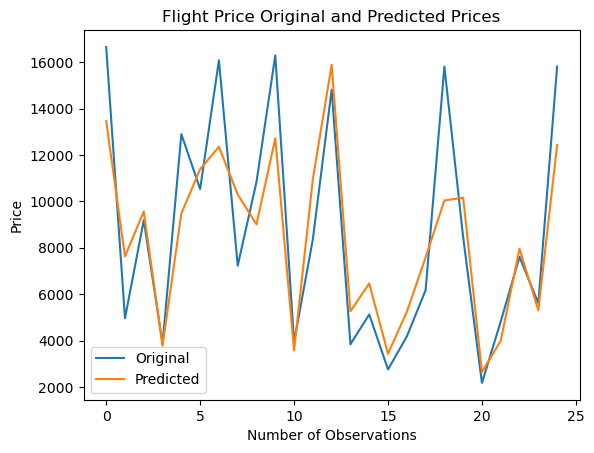

In [39]:
plt.plot(Linear_Plot, y_test[:number_of_observations], label="Original")

plt.plot(Linear_Plot, y_predict[:number_of_observations], label="Predicted")

plt.title("Flight Price Original and Predicted Prices")

plt.xlabel('Number of Observations')

plt.ylabel('Price')

plt.legend()

plt.show()